In [2]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                            average_precision_score)
import numpy as np 
import pandas as pd
%matplotlib inline
import seaborn as sns #библиотека визуализации данных в Python

In [3]:
df = pd.read_csv('titanic3.csv', sep =';')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,"14,4542",NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,"26,5",0.0,0.0,2656,"7,2250",NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,"7,2250",NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29,0.0,0.0,315082,"7,8750",NaN,S,NaN,NaN,NaN


In [4]:
df.shape#2

(1310, 14)

In [5]:
df.drop_duplicates() #дубликаты отсуствуют 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,"14,4542",NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,"26,5",0.0,0.0,2656,"7,2250",NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,"7,2250",NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29,0.0,0.0,315082,"7,8750",NaN,S,NaN,NaN,NaN


In [6]:
df.shape

(1310, 14)

<AxesSubplot:>

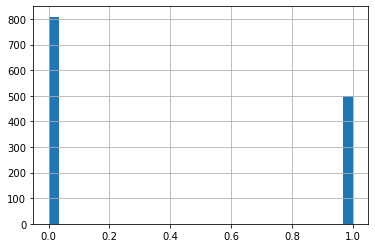

In [7]:
df.survived.hist(bins=30)#классы несбалансированы #3

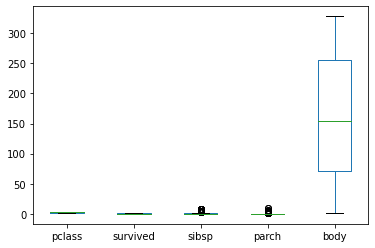

In [8]:
import seaborn as sns
df.plot.box();#4

In [9]:
df['age'] = df['age'].replace(",", ".", regex=True)
df['fare'] = df['fare'].replace(",", ".", regex=True)

numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['pclass', 'survived', 'sibsp', 'parch', 'body']
categorial:  ['name', 'sex', 'age', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'home.dest']


In [10]:
#нормализация количественных признаков
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.000,0.000000,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,0.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,0.125,0.222222,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,0.0,0.0,"Allison, Miss. Helen Loraine",female,2,0.125,0.222222,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,0.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,0.125,0.222222,113781,151.5500,C22 C26,S,NaN,0.409786,"Montreal, PQ / Chesterville, ON"
4,0.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,0.125,0.222222,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


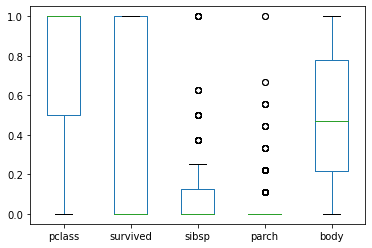

In [11]:
df.plot.box();

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['name', 'sex', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'home.dest']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)
df#5

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0.0,1.0,21,0,29,0.000,0.000000,187,77,43,2,11,NaN,308
1,0.0,1.0,23,1,0.9167,0.125,0.222222,49,56,79,2,2,NaN,230
2,0.0,0.0,24,0,2,0.125,0.222222,49,56,79,2,27,NaN,230
3,0.0,0.0,25,1,30,0.125,0.222222,49,56,79,2,27,0.409786,230
4,0.0,0.0,26,0,25,0.125,0.222222,49,56,79,2,27,NaN,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1.0,0.0,1292,0,NaN,0.125,0.000000,259,39,186,0,27,NaN,369
1306,1.0,0.0,1293,1,26.5,0.000,0.000000,250,193,186,0,27,0.926606,369
1307,1.0,0.0,1294,1,27,0.000,0.000000,264,193,186,0,27,NaN,369
1308,1.0,0.0,1295,1,29,0.000,0.000000,346,221,186,2,27,NaN,369


<AxesSubplot:>

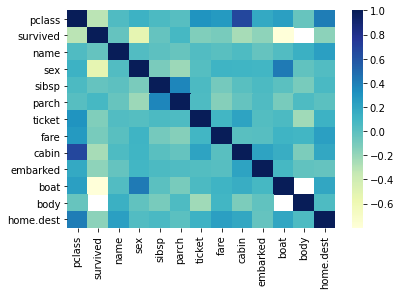

In [13]:
correlation_heatmap = df.corr()
sns.heatmap(correlation_heatmap, cmap = 'YlGnBu', annot=False, fmt='.1f')#6

In [14]:
df.isnull()#7

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1306,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1308,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [15]:
df=df.fillna(0)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0.0,1.0,21,0,29,0.000,0.000000,187,77,43,2,11,0.000000,308
1,0.0,1.0,23,1,0.9167,0.125,0.222222,49,56,79,2,2,0.000000,230
2,0.0,0.0,24,0,2,0.125,0.222222,49,56,79,2,27,0.000000,230
3,0.0,0.0,25,1,30,0.125,0.222222,49,56,79,2,27,0.409786,230
4,0.0,0.0,26,0,25,0.125,0.222222,49,56,79,2,27,0.000000,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1.0,0.0,1292,0,0,0.125,0.000000,259,39,186,0,27,0.000000,369
1306,1.0,0.0,1293,1,26.5,0.000,0.000000,250,193,186,0,27,0.926606,369
1307,1.0,0.0,1294,1,27,0.000,0.000000,264,193,186,0,27,0.000000,369
1308,1.0,0.0,1295,1,29,0.000,0.000000,346,221,186,2,27,0.000000,369


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1310 non-null   float64
 1   survived   1310 non-null   float64
 2   name       1310 non-null   int32  
 3   sex        1310 non-null   int32  
 4   age        1310 non-null   object 
 5   sibsp      1310 non-null   float64
 6   parch      1310 non-null   float64
 7   ticket     1310 non-null   int32  
 8   fare       1310 non-null   int32  
 9   cabin      1310 non-null   int32  
 10  embarked   1310 non-null   int32  
 11  boat       1310 non-null   int32  
 12  body       1310 non-null   float64
 13  home.dest  1310 non-null   int32  
dtypes: float64(5), int32(8), object(1)
memory usage: 102.5+ KB


In [17]:
df.count()

pclass       1310
survived     1310
name         1310
sex          1310
age          1310
sibsp        1310
parch        1310
ticket       1310
fare         1310
cabin        1310
embarked     1310
boat         1310
body         1310
home.dest    1310
dtype: int64

In [18]:
import numpy as np
import sklearn as skl
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
%matplotlib inline
import matplotlib.pyplot as plt

7.Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [24]:
# разделим полученные данные на данные для обучения и теста
X = df.drop(['survived'], axis=1)#признаки
Y = df['survived']#классы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)#обучающиая выборка и тестовые выборки

Линейная регрессия без использования регуляризаторов

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)
reg_predic = reg.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
print('Mean Squared Error = %8.5f' %mean_squared_error(reg_predic, Y_test))#погрешность

print('Pearson rank corr: %8.6f' %pearsonr(reg_predic, Y_test)[0])#корреляция по Пирсону
print('p-value:', pearsonr(reg_predic, Y_test)[1])
#print()
print('Spearman rank corr: %8.6f' %spearmanr(reg_predic, Y_test)[0])#по Спирмену
print('p-value:', spearmanr(reg_predic, Y_test)[1])

Mean Squared Error =  0.06362
Pearson rank corr: 0.854471
p-value: 2.931071041535056e-113
Spearman rank corr: 0.819883
p-value: 9.786848433704507e-97


Линейная регрессия, LASSO регуляризатор



In [27]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
lasso = LassoCV(alphas=np.arange(0.001, 10, 0.05), n_jobs=-1)
lasso.fit(X_train, Y_train)
print('Best alpha:', lasso.alpha_)
lasso_pred = lasso.predict(X_test)

Best alpha: 0.001


In [28]:
print('Mean Squared Error = %8.5f' %mean_squared_error(lasso_pred, Y_test))
print('Pearson rank corr: %8.6f' %pearsonr(lasso_pred, Y_test)[0])#корреляция по Пирсону
print('p-value:', pearsonr(lasso_pred, Y_test)[1])
print('Spearman rank corr: %8.6f' %spearmanr(lasso_pred, Y_test)[0])#по Спирмену
print('p-value:', spearmanr(lasso_pred, Y_test)[1])

Mean Squared Error =  0.06362
Pearson rank corr: 0.854549
p-value: 2.6616685978819005e-113
Spearman rank corr: 0.819605
p-value: 1.284728776623954e-96
